In [40]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import scipy

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
HEIGHT, WIDTH = 224, 224
NUM_CLASSES = 2  # "cat" and "dog"

In [43]:

# Create a ResNet50-based model
def create_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(128, activation='relu')(x)  # Add an additional Dense layer
    x = Dense(64, activation='relu')(x)   # Add another Dense layer
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [44]:
# Create the model
model =create_model()

# Freeze pre-trained layers
for layer in model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [46]:

train_data_dir = '/content/drive/MyDrive/CatvsDog'

In [47]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 1600 images belonging to 2 classes.


In [48]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 400 images belonging to 2 classes.


In [49]:
# Train the model
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=10  # You can adjust the number of epochs
)

Epoch 1/10
50/50 [==============================] - 41s 773ms/step - loss: 0.7084 - accuracy: 0.5000 - val_loss: 0.7087 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 32s 645ms/step - loss: 0.7084 - accuracy: 0.5000 - val_loss: 0.7082 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 37s 736ms/step - loss: 0.7085 - accuracy: 0.5000 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 33s 658ms/step - loss: 0.7085 - accuracy: 0.5000 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 33s 654ms/step - loss: 0.7079 - accuracy: 0.5000 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 32s 647ms/step - loss: 0.7082 - accuracy: 0.5000 - val_loss: 0.7086 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 32s 643ms/step - loss: 0.7086 - accuracy: 0.5000 - val_loss: 0.7086 - val_accuracy: 0.5000

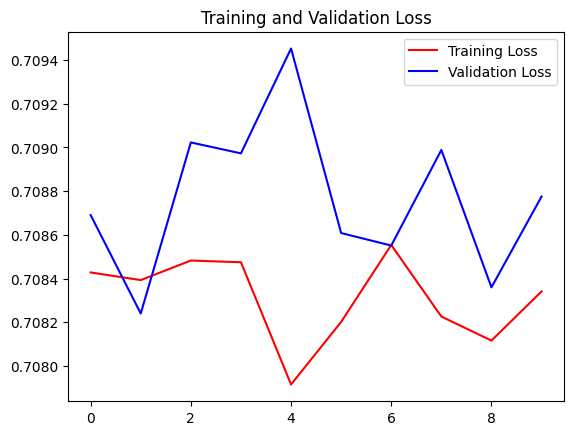

In [52]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))



plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')


plt.legend()
plt.show()